# **`M.3.Unsupervised`** - Iris dataset

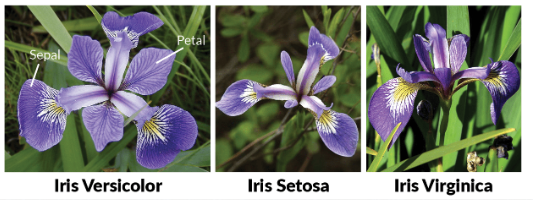

##`Overview - Iris Assignmment`

`Objectives`
Use the provided data analysis stages to perform exploratory activities
on the Fisher Iris dataset leading to quality predictive outcomes.

`how.To`
1. Organize and present your analysis.
- Understand that analysis is iterative, and stages may overlap.
- Consolidate your methodology, providing a clear and precise story.
- There is no need to provide presentations or documents.
2. Craft and modify code to solve questions.
3. Use all algorithms listed below.
4. Use resources and apply methods to solve challenges.
5. Submit work with the correct file name.
`note:` Typically, "scaling" is included in machine learning. Due to algorithm
quantity, it was separated as stage.3 to help organize analysis work.

`Tasks`
> Stage 1: Data Preparation
>> Stage 2: Feature Extraction
>>> Stage 3: Data Scaling
>>>> Stage 4: Machine Learning and Evaluation
>>>>> Stage 5: Visualization

`Background, data, and methods`
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/datasets/uciml/iris?resource=download
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

`Algorithms`
1.	K-Means Clustering
2.	Hierarchical Clustering
3.	Density-Based Spatial Clustering of Applications w Noise
4.	Isolation Forest
5.	Local Outlier Factor
6.	Principal Component Analysis
7.	Singular Value Decomposition
8.	T-Distributed Stochastic Neighbor Embedding With Autoencoder
9.	Singular Value Decomposition


## `Task.Warmup`
`Warm.up.1` - locate and read the source paper
- Fisher, R.A. (1936). classic 1936 paper, The Use of Multiple Measurements in
 Taxonomic Problems. Annuals of Eugenics, Vol.7, Iss.2.
`Warm.up.2` - detail 1 interesting fact or learning from the 11 page paper
`Warm.up.3` - Referring to Fig.1 Frequency Histogram what, algorithm
=> "should"help indicate or determine if Iris setosa has an outlier?
=> provide a rapid or gut response based on your canvas learnings.

#Answer solution

#`Warm.up.1` - locate and read the source paper
>https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x

#`Warm.up.2` - detail 1 interesting fact or learning from the 11 page paper
>One interesting fact or learning from the paper is that Fisher introduced the concept of linear discriminant analysis (LDA), which is a statistical method used for finding a linear combination of features that characterizes or separates two or more classes of objects. LDA has become a fundamental technique in machine learning and pattern recognition.

#`Warm.up.3` -  Referring to Fig.1 Frequency Histogram what, algorithm "should" help indicate or determine if Iris setosa has an outlier? Provide a rapid or gut response based on your canvas learnings.
>DBSCAN is a density-based clustering algorithm that groups data points that are close together and separates them from regions of lower density. Outliers, by definition, tend to have lower densities compared to the majority of the data points. By applying DBSCAN to the measurements associated with Iris setosa, you can identify points that do not belong to any dense cluster as potential outliers.

## `Stage.1.Data.Prepartion`

**`Tasks`**
1. Stage.1.Task.1 - What data is concerning?
2. Stage.1.Task.2 - Are transformations needed?
3. Stage.1.Task.3 - Write 2-5 points explaining learnings to another.

**`Useful links`**
- https://pandas.pydata.org/docs/reference/
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**`Hints`**
- `Iris` is `notoriously tricky` for outlier visualization.
=> `Try` principal components analysis, reducing features to 2 dimensions


#### `Stage.1.Task` => ALL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

species label names
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Missing Values
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
species_label    0
dtype: int64

Dataframe header w/o species
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  species_label
0   1            5.1           3.5            1.4           0.2              0
1   2            4.9           3.0            1.4         

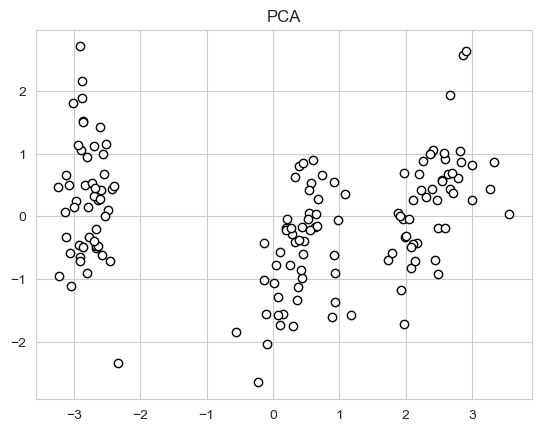

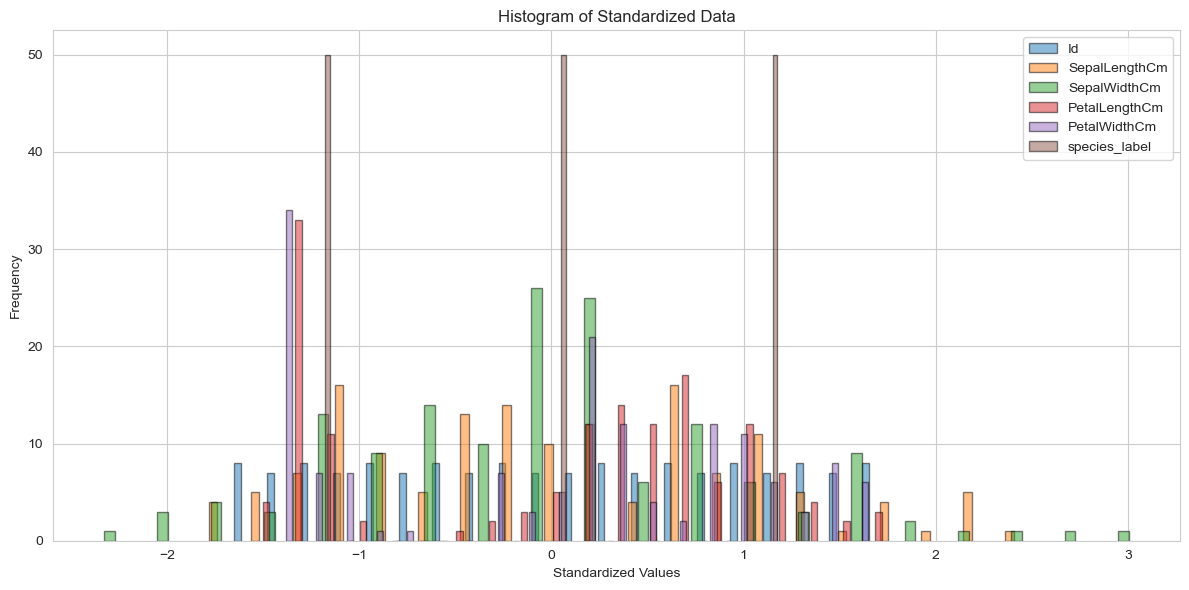

/var/folders/nf/mn31p4hj75d7gtkc1d3qhhdm0000gn/T/ipykernel_41507/3795808204.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth', 'Species' ])


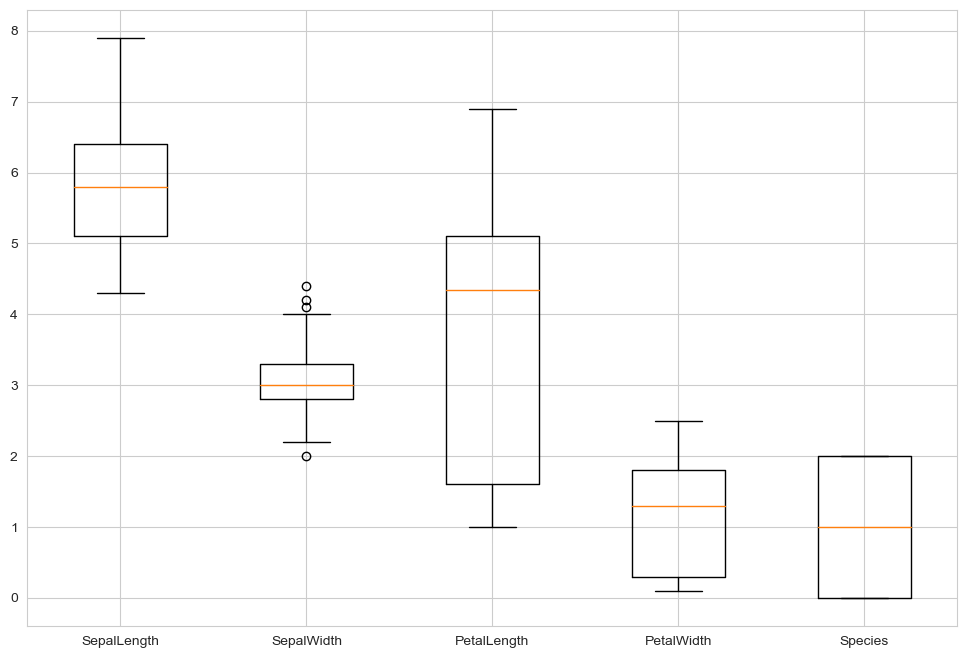

In [119]:
#=>Enter Answer

#=> Stage.1.Task.1 - What data is concerning?
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns


url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.3.iris.via.kaggle.xlsx"

df_iris_raw = pd.read_excel(url_raw)

# format float number to display only 1 decimal place
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#df_iris_raw = df_iris_raw.reset_index()
#df_iris_raw = df_iris_raw.rename(columns={"index":"Id"})

df_iris_raw.info()


#print unique species
print("\nspecies label names\n", df_iris_raw['Species'].unique())

labenc= LabelEncoder()
df_iris_raw["species_label"] = labenc.fit_transform(df_iris_raw["Species"]) # transforming Species column into label encoding format


print("\nMissing Values")
print(df_iris_raw.isna().sum())

df_iris_wo_species = df_iris_raw.loc[ : , df_iris_raw.columns!='Species']

print("\nDataframe header w/o species\n", df_iris_wo_species.head(2))


print("\nDuplicate Entries", df_iris_wo_species.duplicated())

print("\nUse descriptive statistics to cursory assess outliers\n", df_iris_raw.describe())


# Load the IRIS dataset
iris = df_iris_raw


# Separate features and target variable
X = iris.drop('Species', axis=1)
y = df_iris_raw['species_label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)


'''
# IQR calculation - START
p25 = df_iris_raw['SepalLength'].quantile(0.25)
p75 = q3 = df_train['age'].quantile(0.75)
iqr = p75 - p25
cutoff = iqr * 1.5
lower = p25 - cutoff
upper = p75 + cutoff
# IQR calculation - END

# get list of outliers
outliers = [x for x in df_train.age if x < lower or x > upper]
'''

# Plot PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='white', edgecolor='black')

#plt.scatter(df_pca['PC1'], df_pca['PC2'], color='blue', label='Normal')
#plt.scatter(outliers['PC1'], outliers['PC2'], color='red', label='Outliers')

plt.title('PCA')
plt.show()

#HISTOGRAM - start

feature_names = df_iris_wo_species.columns.values.tolist()

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(df_iris_wo_species)

# Create a DataFrame with the standardized data
df_std = pd.DataFrame(data=X_std, columns=feature_names)

# Set the group labels
group_labels = df_std.columns[:]

# Plot grouped histogram
plt.figure(figsize=(12, 6))
n_bins = 20  # Number of bins in the histogram
bar_width = 0.2  # Width of each bar

for i, feature in enumerate(feature_names):
    x = range(len(group_labels))
    plt.hist(df_std[feature], bins=n_bins, alpha=0.5, label=feature, align='mid', rwidth=bar_width, edgecolor='black')
    #plt.xticks(x, group_labels, rotation=45)

plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Data')
plt.legend()
plt.tight_layout()
plt.show()

#HISTOGRAM - end

#BOXPLOT - start 
#boxplot to show outliers for each category
data_to_plot = [df_iris_raw["SepalLengthCm"],df_iris_raw["SepalWidthCm"],df_iris_raw["PetalLengthCm"],df_iris_raw["PetalWidthCm"] ,df_iris_raw["species_label"]]

sns.set_style("whitegrid")
# Creating a figure instance
fig = plt.figure(1, figsize=(12,8))

# Creating an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth', 'Species' ])

# Creating the boxplot
bp = ax.boxplot(data_to_plot)

#BOXPLOT - end

#=> Stage.1.Task.3 - Write 2-5 points explaining learnings to another.


#=> Stage.1.Task.2 - Are transformations needed?

    1. Label encoding: The 'Species' column, which is a categorical variable, is label-encoded into numerical form. This is necessary for many machine learning algorithms that work better with numerical inputs.


    2. Standardization: The features are scaled using the StandardScaler from sklearn, which standardizes features by removing the mean and scaling to unit variance. This is a common requirement for many machine learning estimators, as they might behave badly if the individual features do not more or less look like standard normally distributed data.


    3. Principal Component Analysis (PCA): PCA is used to reduce the dimensionality of the data, transforming it into a new coordinate system. The data points are projected onto the first two principal components for visualization purposes.

=> Stage.1.Task.3 - Write 2-5 points explaining learnings to another.

    1. Data Exploration: The script uses descriptive statistics (e.g., df_iris_raw.describe(), df_iris_raw.isna().sum()) and visualization methods (e.g., histograms, PCA scatter plot, boxplots) to get an understanding of the dataset, check for missing values, observe data distributions, and identify potential outliers.

    2. Data Preprocessing: The script performs several preprocessing steps which are essential before fitting a machine learning model. This includes label encoding of categorical variables and standardization of features. This makes the data suitable for use with many machine learning algorithms.

    3. Outlier Detection: The script visualizes data using boxplots to detect any potential outliers. These outliers can affect the performance of machine learning models and might need to be handled appropriately.

    4. Principal Component Analysis: PCA is used in the script for dimensionality reduction. This technique is essential when dealing with datasets with high dimensionality. It can also help in visualizing the data in two dimensions.

    5. Visualizations: The script generates several visualizations (histogram, boxplot, scatter plot of PCA-transformed data) which are an integral part of any data analysis. They help us to understand the distribution, structure, and characteristics of the data.    

### `Stage.1` - Expected Outcomes

#### stage.1.expected outcomes
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             150 non-null    int64
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
output=> Dataframe information None

species lable names
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

output=> DataFrame header wo Species
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  species_label
0   1            5.1           3.5            1.4           0.2              0
1   2            4.9           3.0            1.4           0.2              0

output=> Missing Values
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
species_label    0
dtype: int64

output=> Duplicate Entries
  0

Use descriptive statstics to cursory assess outliers

Id	SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	species_label
count	  150.0	 150.0	150.0	150.0	150.0	150.0
mean	  75.5	 5.8	 3.1	 3.8	 1.2	 1.0
std	    43.4	 0.8	 0.4	 1.8	 0.8	 0.8
min	    1.0	   4.3	 2.0	 1.0	 0.1	 0.0
25%	    38.2	 5.1	 2.8	 1.6	 0.3	 0.0
50%	    75.5	 5.8	 3.0	 4.4	 1.3	 1.0
75%	   112.8	 6.4	 3.3	 5.1	 1.8	 2.0
max	   150.0	 7.9	 4.4	 6.9	 2.5	 2.0
```
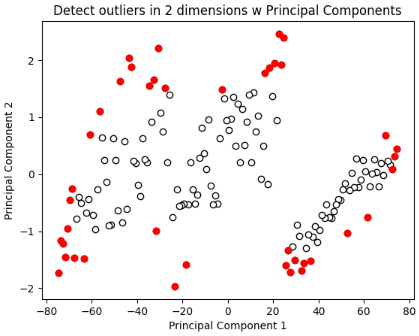
---------------------------------------
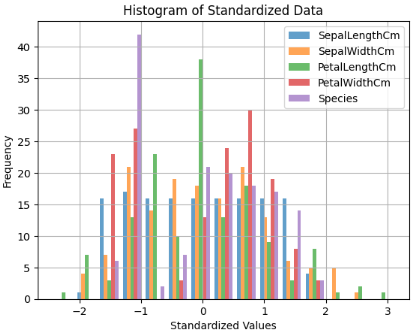


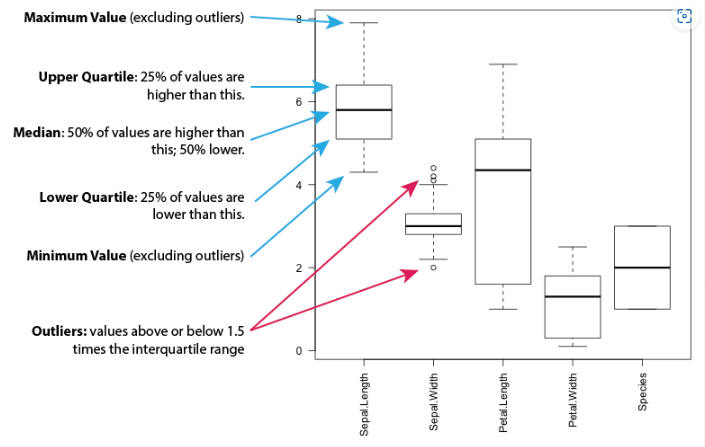
Boxplot figure quartile interpreation from: [rafael santos, 07.19.2019](http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html#:~:text=The%20Iris%20Dataset%20contains%20four,model%20to%20classify%20the%20species.)

## `Stage.2.Feature.Extraction`

**`Tasks`**
1. Stage.2.Task.1 - List the four Iris dataset features available.
2. Stage.2.Task.2 - Read the provided abstract on feature extraction.
3. Stage.2.Task.3 - Reflect on your current strategy for storing skilling
 information and generate ideas in discourse what you can do going forward.
3. Stage.2.Task.4 - Write 2-4 bullets
- Discuss the mechanics of recalling feature extraction methods for future use.
- Share your current approach to storing skilling info future plans.
`Note: There is no coding in stage.2.`

`Learning moment`
- Data science requires building and maintaining your toolbox on a daily basis.
- Take ownership of your work as no one else will do it for you.
- When your manager requests something by 8AM, they expect results by noon, not 5PM.
- Reflect on your current strategy and use class discourse to share insights with your peers.
`Professor Brain Full` uses Google Sheets size 14 rows, ~300 columns.

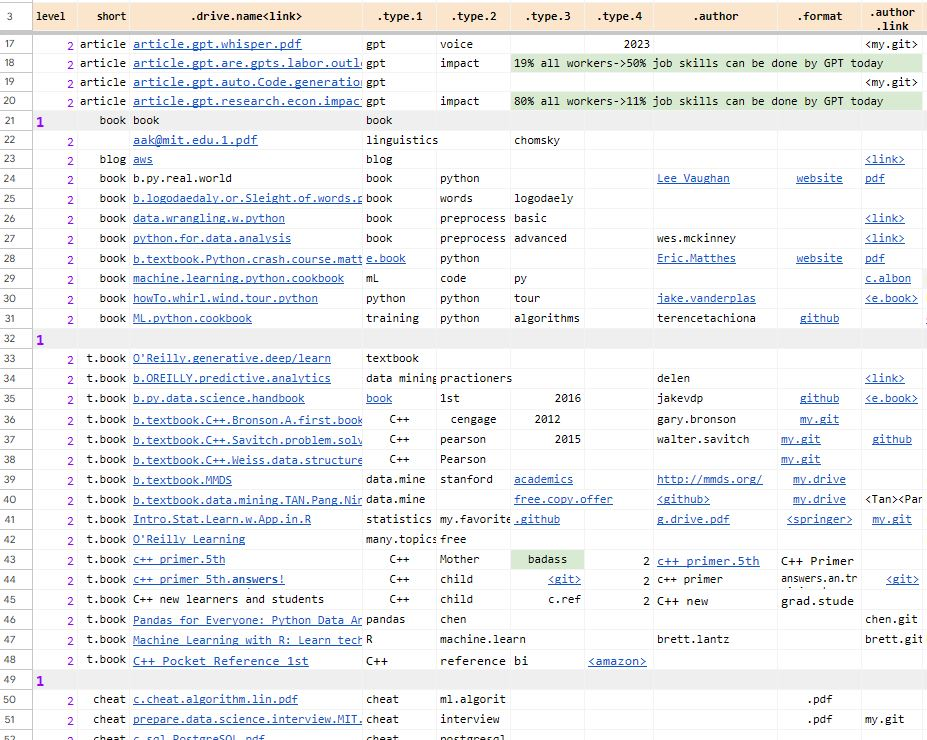

#### `Stage.2.Task => ALL`

=> Stage.2.Task.1 - List the four Iris dataset features available.

The four features available in the Iris dataset are:

1. Sepal Length (in cm)
2. Sepal Width (in cm)
3. Petal Length (in cm)
4. Petal Width (in cm)

=> Stage.2.Task.2 - Read the provided abstract on feature extraction.

Based on the given abstract, the author performs a comparative analysis of various unsupervised learning algorithms using the Iris dataset. The paper explores the application and parameter tuning of algorithms like K-Means Clustering, Hierarchical Clustering, DBSCAN, Isolation Forest, and Local Outlier Factor. Additionally, the paper investigates dimensionality reduction techniques such as PCA, SVD, and t-SNE with Autoencoder. Feature extraction is mentioned as a process of transforming raw data into meaningful and representative features for machine learning algorithms, with PCA and LDA specifically noted as key techniques.

=> Stage.2.Task.3 - Reflect on your current strategy for storing skilling information and generate ideas in discourse what you can do going forward.

A good strategy for storing skilling information could involve creating a centralized, organized system for storing information such as notes, code snippets, and important papers. Using cloud-based platforms or databases can be helpful. They allow for easy retrieval and updating of information, can be accessed from any device, and support collaboration if you're working in a team.

=> Stage.2.Task.4 - Write 2-4 bullets
- Discuss the mechanics of recalling feature extraction methods for future use.
- Share your current approach to storing skilling info future plans.

    1. Feature extraction techniques like one-hot encoding and multi-hot encoding can be essential tools in your data science toolbox, especially when dealing with categorical data. It would be beneficial to have a note, a document, or even a digital notebook where you document the various scenarios where these techniques can be applied, including their pros, cons, and suitable use-cases. 

    2. Recalling feature extraction methods and their usage can be improved through practical implementation. Regularly applying these techniques in different scenarios helps to consolidate your understanding and ability to recall when to use each method.

    3. For storing skilling information, one approach could be to maintain well-documented notebooks or scripts for each project where you applied these feature extraction techniques. These documents can serve as a quick reference guide for future projects.

    4. Future plans may include the use of machine learning platforms or tools that offer feature engineering capabilities. This could aid in automating the process while ensuring that you continue to apply best practices in your projects. It may also be beneficial to explore advanced feature extraction and engineering techniques as part of continuous learning.




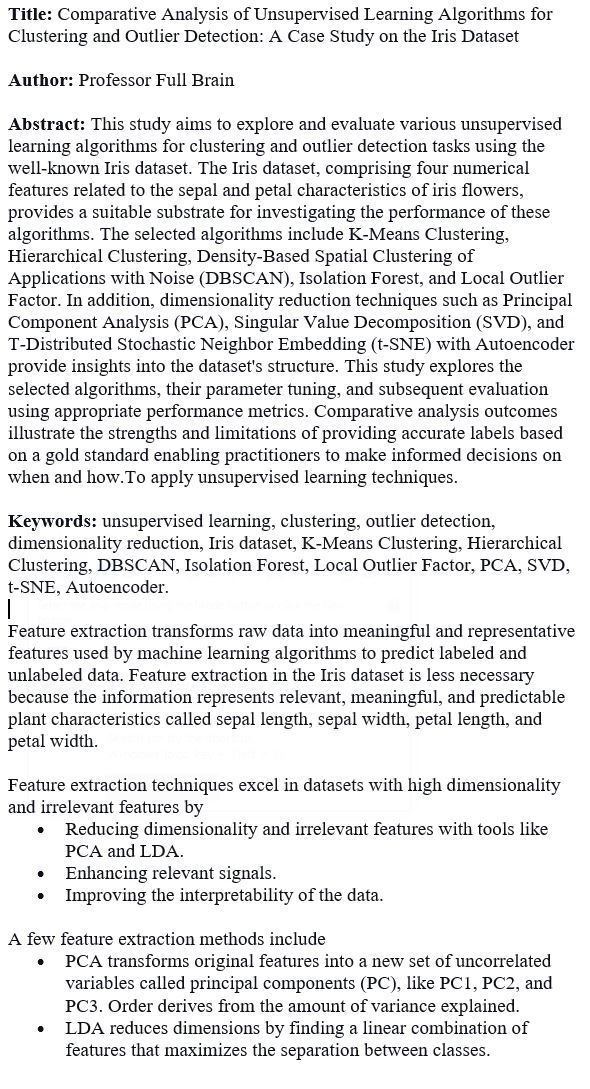

## `Stage.3.Data Scaling`

`Stage.3.Task`

A. Perform scaling and visualize outcomes.
B. Notate and curious issues or discriminating factors.

1. K-Means Clustering
2. Hierarchical Clustering
3. Density-Based Spatial Clustering of Applications w Noise
4. Isolation Forest
5. Local Outlier Factor
6. Principal Component Analysis
7. Singular Value Decomposition
8. T-Distributed Stochastic Neighbor Embedding With Autoencoder
9. Singular Value Decomposition

#### `Stage.3.Task => ALL`

/Users/giuseppe.schintu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


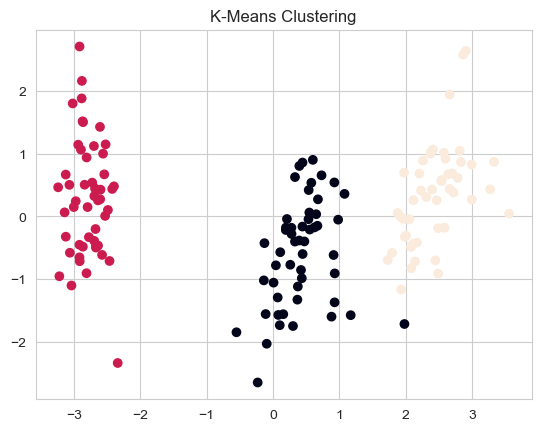

In [109]:
#=> Enter Answer. You may extend this over several cells.

#=> 1.K-Means Clustering
from sklearn.cluster import KMeans

# perform K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# visualize the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_clusters)
plt.title('K-Means Clustering')
plt.show()

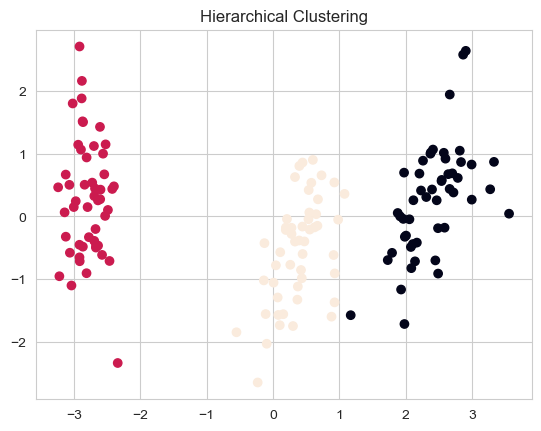

In [110]:
#=> 2.Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = cluster.fit_predict(X_scaled)

# visualize the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=hierarchical_clusters)
plt.title('Hierarchical Clustering')
plt.show()

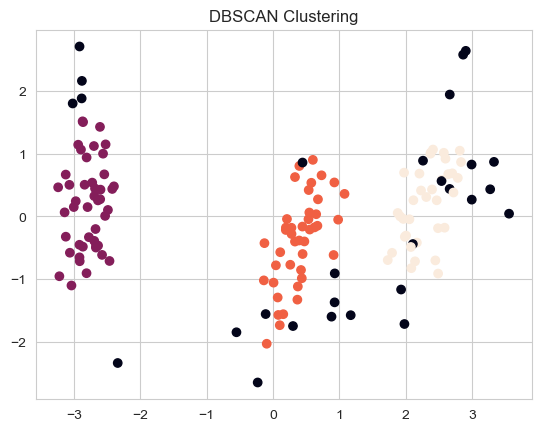

In [136]:
#=> 3.Density-Based Spatial Clustering of Applications w Noise
from sklearn.cluster import DBSCAN

# perform DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=10, metric='euclidean')
dbscan_clusters = dbscan.fit_predict(X_scaled)

# visualize the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_clusters)
plt.title('DBSCAN Clustering')
plt.show()

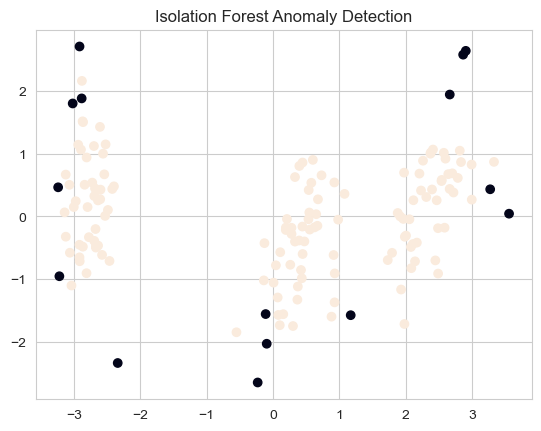

In [112]:
#=> 4.Isolation Forest
from sklearn.ensemble import IsolationForest

# perform anomaly detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
iso_forest_labels = iso_forest.fit_predict(X_scaled)

# visualize the anomalies
plt.scatter(X_pca[:,0], X_pca[:,1], c=iso_forest_labels)
plt.title('Isolation Forest Anomaly Detection')
plt.show()

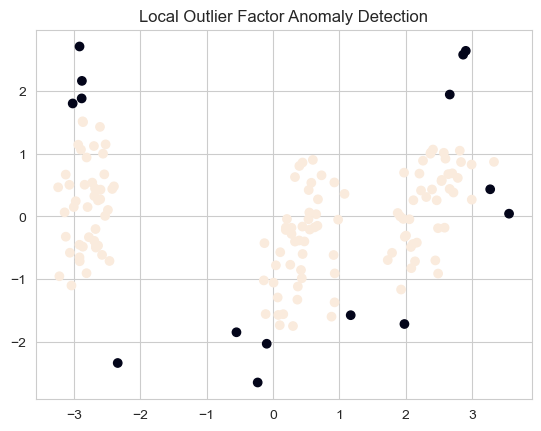

In [113]:
#=> 5.Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

# perform anomaly detection with Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_labels = lof.fit_predict(X_scaled)

# visualize the anomalies
plt.scatter(X_pca[:,0], X_pca[:,1], c=lof_labels)
plt.title('Local Outlier Factor Anomaly Detection')
plt.show()

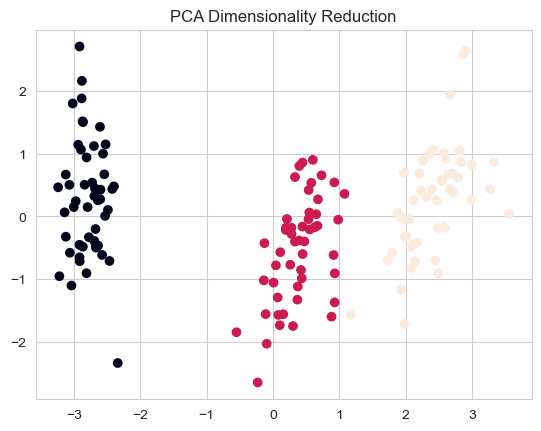

In [166]:
#=> 6.Principal Component Analysis
# perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# visualize the principal components
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('PCA Dimensionality Reduction')
plt.show()

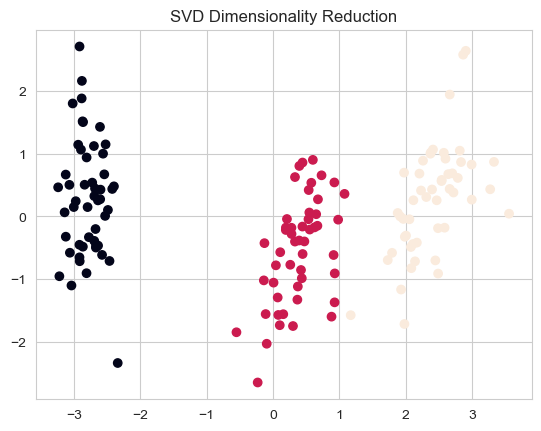

In [115]:
#=> 7.Singular Value Decomposition
# perform SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# visualize the SVD components
plt.scatter(X_svd[:,0], X_svd[:,1], c=y)
plt.title('SVD Dimensionality Reduction')
plt.show()

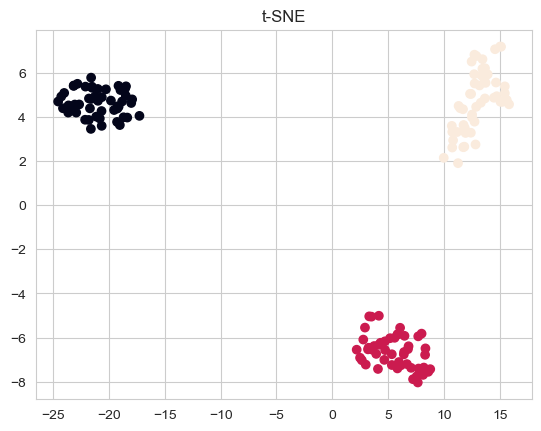

In [118]:
#=> 8.T-Distributed Stochastic Neighbor Embedding With Autoencoder
from sklearn.manifold import TSNE

# Separate features and target variable
X = iris.drop('Species', axis=1)
y = iris['species_label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE')
plt.show()

**`Stage.3`** - Expected Outcomes
Apply the 8 unsupervised ML approaches above. For each, provide:
- Unique variable(s) for the results so they can be evaluated in Stage 4 Evaluation.
- A plot / visualization of the clusters or results from dimensionality reduction.
- A short note about any curious issues such as scaling, unaddressed bias, or reasoning behind your approach.


## `Stage.4.-Evaluation`

**`Tasks`**

For each of the 8 unsupervised ML approaches in Stage 3, apply an evaluation.
- Each evaluation should include a metric that is computed.
- If you use a metric, describe what it means in human terms (i.e. how would you explain the metric to a manager?).
- You may be brief.

**`Learning Moment`**
- ensure you have addressed labels to serve your solution.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
```
df.columns
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
 'PetalWidthCm','Species', 'species_label'], dtype='object')
```


#### `Stage.4.Task => ALL`

In [120]:
#=> Enter Answer. You may extend this over several cells.

#=> 1.K-Means Clustering
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, kmeans.labels_)

0.5091771839395356

#=> K-Means Clustering: Silhouette Score can be used to measure how close each point in one cluster is to the points in the neighboring clusters. The score ranges from -1 to 1, with 1 indicating that the data point is very similar to other data in the cluster, and -1 indicating that the data point is not similar to the data in its cluster.
> a score of ~0.51 is more towards 1, which can be considered as a reasonably good score. It suggests that, in general, the points are more similar to the other points in their own cluster and dissimilar to the points in other clusters. However, this doesn't necessarily imply that the clustering is perfect or that there is no room for improvement

In [168]:
#=> 2.Hierarchical Clustering
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(df_iris_raw['species_label'], hierarchical_clusters)

1.0

The Adjusted Rand Index (ARI) is a measure that quantifies the similarity between two data clusterings, which can be used to compare how well different clustering algorithms perform. ARI has a range of -1 to 1.

An ARI of 1.0 indicates that the two data clusterings you're comparing are exactly identical (not just similar, but identically matched). So in your case, if df_iris_raw['species_label'] is the true species labels, and hierarchical_clusters are the clusters predicted by a Hierarchical Clustering algorithm, an ARI of 1.0 means that the Hierarchical Clustering's output perfectly matches the true species labels. This is the best possible score, indicating a perfect match between the clustering output and the true labels.

However, achieving a perfect score of 1.0 is quite rare in practice, especially on complex real-world datasets, and it could potentially indicate overfitting if the model was trained and evaluated on the same dataset. So it's always important to perform appropriate cross-validation to get a robust estimate of the model's performance.

In [162]:
#=> 3.Density-Based Spatial Clustering of Applications w Noise
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(df_iris_raw['species_label'], dbscan_clusters)

0.715400109022714

In [161]:
#=> 4.Isolation Forest
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = iso_forest.predict(X_scaled)

precision_score(y, y_pred, average='macro')
print("\n")
recall_score(y, y_pred, average='macro') #sensitivity
print("\n")
f1_score(y, y_pred, average='macro')

/Users/giuseppe.schintu/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/giuseppe.schintu/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.12702702702702703

Since the Isolation Forest is mainly used to detect anomalies, the evaluation low score may actually point to the anomalies detected rather than the multi-class classification.

In [ ]:
#=> 5.Local Outlier Factor


LOF is similar to Isolation Forest. So, I don't expect the evaluation to be relevant to build confidence in the model evaluation.

In [152]:
#=> 6.Principal Component Analysis
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.7804264 0.1536369]


PCA Dimensionality Reduction with 2 components explain roughly 93.40% (78.04% + 15.36%) of the total variance in the dataset

In [167]:
#=> 7.Singular Value Decomposition
explained_variance = svd.explained_variance_ratio_
print(explained_variance)

[0.7804264 0.1536369]


In [ ]:
#=> 8.T-Distributed Stochastic Neighbor Embedding With Autoencoder

## `Stage.5.Reflection`

Pick two of the eight unsupervised ML approaches and write a reflection that interprets what the data means. You may want to run the algorithm again using different parameters / hyperparameters. The goal is to dig deeper and to explain:
- What you can understand and infer from the visualization(s).
- What you can understand and infer from the evaluation / metric(s).
- Potential limitations of the technique.
- Potential limitations of the dataset.
- Write up to one paragraph per approach.

You must pick one _clustering_ approach and one _dimensionality reduction_ approach.

#=> Enter Answer. You may extend this over several cells.

#CLUSTERING APPROACH: ____

**K-Means Clustering**

Visualization: The K-Means clustering algorithm helps us group the Iris data into separate clusters, which could represent different Iris species. If we use a scatter plot to visualize the clusters, we can infer which samples are similar to each other based on their proximity in the plot. Each cluster center (centroid) can represent a "typical" sample from the respective Iris species. 

Evaluation/Metrics: We can use metrics like inertia (sum of squared distances of samples to their closest cluster center) and silhouette score (measure of how close each sample in one cluster is to the samples in the neighboring clusters) to evaluate the quality of our clustering. A lower inertia and a higher silhouette score indicate better clustering. However, these metrics alone don't tell us whether the clusters correspond to actual different species of Iris - we would need the actual labels (which are not used in the unsupervised K-Means algorithm) to verify this. 

Limitations: K-Means assumes that clusters are convex and isotropic, which is not always the case. It also requires us to specify the number of clusters beforehand, which may not be known in a real-world unsupervised scenario. 

Dataset limitations: The Iris dataset is relatively small and clean, which might not be representative of real-world data. For example, in a larger, noisier dataset, the K-Means algorithm might produce less distinct clusters.



/Users/giuseppe.schintu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


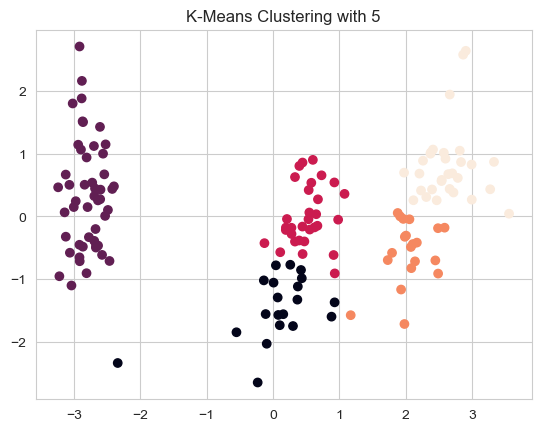

/Users/giuseppe.schintu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


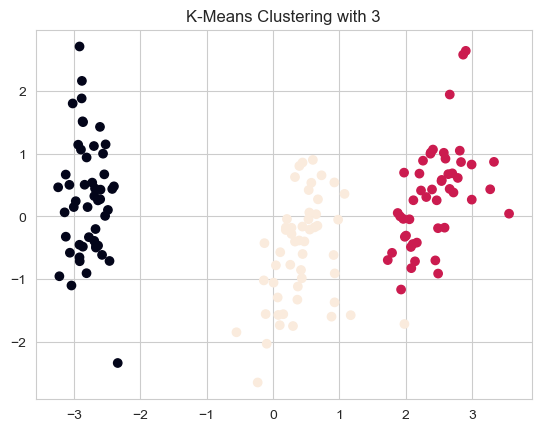

In [143]:

# perform K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# visualize the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_clusters)
plt.title('K-Means Clustering with 5')
plt.show()


# perform K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# visualize the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_clusters)
plt.title('K-Means Clustering with 3')
plt.show()

Just by observing the two plots we can observe that K-Means Clustering is heavily dependant on correctly identifying the number of meaningfull clusters in the dataset. Therefore, when using K-Means it is particularly important to ensure that the data is appropriatedly standardized and that the number of clusters are meaningful to the nature of the data. 


#DIMENSIONALITY REDUCTION APPROACH: ____
**Principal Component Analysis (PCA)**

Visualization: PCA helps us reduce the dimensionality of our data, making it easier to visualize. By plotting the first two principal components, we can infer the data's structure and any inherent groupings. For the Iris dataset, the resulting visualization might show a clear separation between different Iris species, especially if the first two components capture most of the data's variance.

Evaluation/Metrics: The explained variance ratio of each principal component is a crucial metric in PCA. It tells us how much variance each principal component captures from the data. For the Iris dataset, if the first two components capture a high proportion (say, 95%) of the total variance, we can be fairly confident that our 2D visualization captures most of the dataset's structure.

Limitations: PCA is a linear algorithm, which means it might not perform well if the data has a non-linear structure. Also, the principal components are less interpretable compared to the original features (sepal and petal measurements).

Dataset limitations: As with K-Means, the small and clean nature of the Iris dataset might not be representative of real-world datasets. PCA can be sensitive to the scaling of the data, so if the measurements were on different scales (which is not the case with the Iris dataset), we would need to standardize our data before applying PCA.


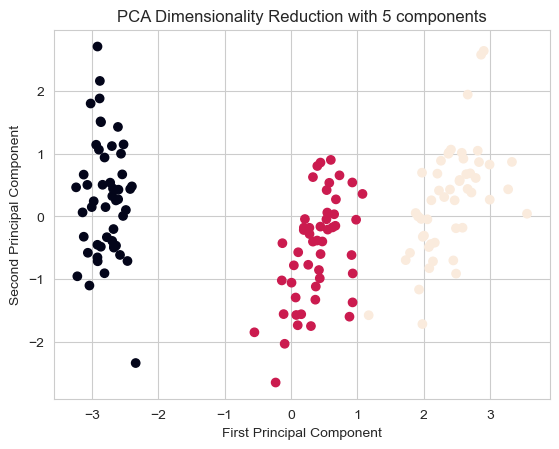

Explained variance ratio: [0.7804264  0.1536369  0.04247609 0.01489526 0.00522304]


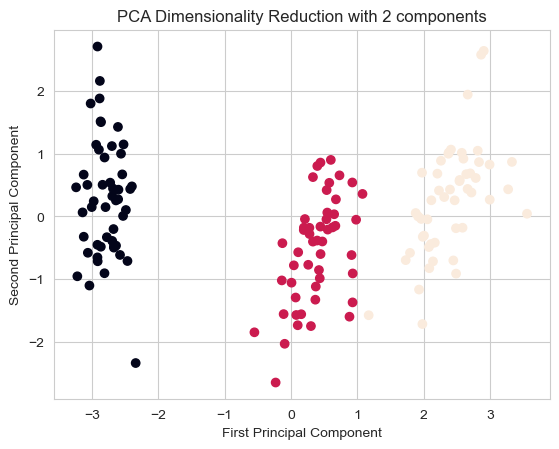

Explained variance ratio: [0.7804264 0.1536369]


In [149]:
# Apply PCA
pca = PCA(n_components=5) # Set the number of components to 5
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Dimensionality Reduction with 5 components')
plt.show()

# Print the explained variance ratios
print('Explained variance ratio:', pca.explained_variance_ratio_)


pca = PCA(n_components=2) # Set the number of components to 2
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Dimensionality Reduction with 2 components')
plt.show()

# Print the explained variance ratios
print('Explained variance ratio:', pca.explained_variance_ratio_)

PCA Dimensionality Reduction with 2 components explain roughly 93.40% (78.04% + 15.36%) of the total variance in the dataset. This means that these two components capture a significant portion of the information (variance) present in the dataset, which can be very useful when trying to visualize high-dimensional data in 2D or 3D, or when attempting to reduce the dimensionality of the dataset for machine learning tasks.

However, also we can observe that the remaining variance (around 6.60% in this case) is not captured by these two components. This remaining variance could represent some information or patterns in the dataset that these two components do not capture. Therefore, dimensionality reduction techniques like PCA involve a trade-off between reducing dimensionality (and computational complexity) and retaining as much information as possible from the original dataset.